# **Assignment \#4**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2

In [1]:
# TODO: RA & Name 
print('RA1: ' + 'Full_Name_1')
print('RA2: ' + 'Full_Name_2')

RA1: Full_Name_1
RA2: Full_Name_2


## Objective

Exploring **unsupervised learning techniques** by using dimensionality reduction techniques.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import torch
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import layers, models
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator

## Dataset

Fashion-MNIST is a dataset of Zalando’s article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

Dataset Information:

- You should respect the following traininig/test split: 60,000 training examples, and 10,000 test examples. Avoid overfitting.

- The data is available at:
https://www.dropbox.com/s/qawunrav8ri0sp4/fashion-mnist-dataset.zip:
‘train’ folder (fashion-mnist train.csv.zip) + ‘test’ folder (fashion-mnist test.csv.zip).

  - You can also download the data by the framework you are using.

- Each training and test example is assigned to one of the following labels: 0 t-shirt/top, 1 trouser, 2 pullover, 3 dress, 4 coat, 5 sandal, 6 shirt, 7 sneaker, 8 bag, 9 ankle boot.
- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255). Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv.

In [3]:
# Download Fashion-MNIST
train, test = pd.read_csv('fashion-mnist_train.csv'), pd.read_csv('fashion-mnist_test.csv')

x_train, x_val, y_train, y_val = train_test_split(
    train.loc[:, train.columns!='label'], train.loc[:, train.columns=='label'], 
    test_size = 0.3, random_state= 10
)
x_test, y_test = test.loc[:, test.columns!='label'], test.loc[:, test.columns=='label']

In [4]:
x_train.shape, x_val.shape

((42000, 784), (18000, 784))

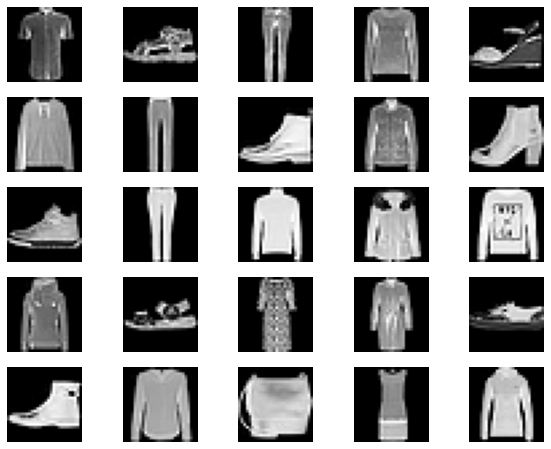

In [5]:
# Plot a data grid for general observation

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(x_train.to_numpy().reshape(-1, 28, 28, 1) ), size=(1,)).item()
    img = x_train.to_numpy().reshape(-1, 28, 28, 1) [sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [7]:
x_train_values = x_train_scaled.reshape(-1, 28, 28, 1) 
x_val_values = x_val_scaled.reshape(-1,28,28,1)
x_test_values = x_test_scaled.reshape(-1,28,28,1)

x_train_values.shape, x_val_values.shape, x_test_values.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train.shape, y_val.shape, y_test.shape

((42000, 10), (18000, 10), (10000, 10))

### Activities

1. (2 points) Baseline: Explore Convolutional Neural Networks with Fashion-MNIST. What is the accuracy of your CNN model? (1.5 points) Describe your Convolutional Neural Network architecture. (0.5 points) What are your conclusions about the baseline?

In [9]:
# Set the parameters of the neural network
bs_model = Sequential()

loss_function = 'categorical_crossentropy'
opt = 'adam'

In [10]:
# Create your convolutional neural network architecture

bs_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
bs_model.add(layers.MaxPooling2D((2,2)))
bs_model.add(layers.Conv2D(64, (3,3), activation='relu'))
bs_model.add(layers.MaxPooling2D((2,2)))
bs_model.add(layers.Flatten())
bs_model.add(layers.Dense(54, activation='relu'))
bs_model.add(layers.Dense(10, activation='softmax'))

In [11]:
bs_model.compile(
    optimizer = opt, 
    loss = loss_function, 
    metrics = ['accuracy']
)

In [12]:
bs_hist = bs_model.fit(x_train_values, y_train, epochs=10,
                       validation_data = (x_val_values, y_val))

Epoch 1/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.4846 - accuracy: 0.8235 - val_loss: 0.3768 - val_accuracy: 0.8688
Epoch 2/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3245 - accuracy: 0.8815 - val_loss: 0.3112 - val_accuracy: 0.8877
Epoch 3/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.2721 - accuracy: 0.9018 - val_loss: 0.2808 - val_accuracy: 0.8988
Epoch 4/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2370 - accuracy: 0.9153 - val_loss: 0.2838 - val_accuracy: 0.8962
Epoch 5/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.2088 - accuracy: 0.9237 - val_loss: 0.2631 - val_accuracy: 0.9061
Epoch 6/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1841 - accuracy: 0.9314 - val_loss: 0.2809 - val_accuracy: 0.9021
Epoch 7/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1618 - accuracy: 0.9396 - val_loss: 0.2831 -

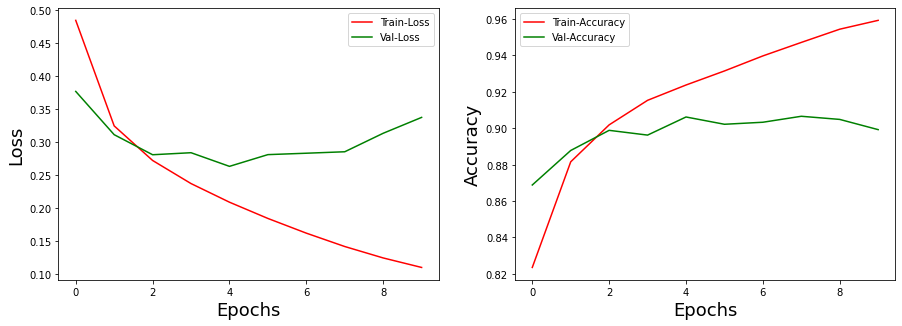

In [13]:
# Report your accuracy using convolutional neural network

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(bs_hist.history['loss'], color='red', label='Train-Loss')
plt.plot(bs_hist.history['val_loss'], color='green', label='Val-Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(bs_hist.history['accuracy'], color='red', label='Train-Accuracy')
plt.plot(bs_hist.history['val_accuracy'], color='green', label='Val-Accuracy')
plt.legend(loc='best')
plt.show()

In [14]:
# What are your conclusions about the baseline? 

2. (2 points) Using PCA: Re-do the first experiment considering the PCA dimensionality reduction. (1.5 points) Consider two different energies (variance) for reducing the image dimensionality. (0.5 points) What are the conclusions when using PCA in this problem? Does the accuracy improve?

In [71]:
# Run PCA methods

pca25 = PCA(n_components=25)
x_train_pca25 = pca25.fit(x_train_scaled).transform(x_train_scaled)
x_val_pca25 = pca25.transform(x_val_scaled)

In [72]:
variab_top25 = pca25.explained_variance_ratio_

pca25_values = {
    'Componente':np.arange(pca25.n_components_) + 1,
    'Variab Explicada':variab_top25,
    'Variab Acumulada':np.cumsum(variab_top25)
}

In [73]:
pd.DataFrame(pca25_values).head(30)

,Componente,Variab Explicada,Variab Acumulada
0,1,0.221123,0.221123
1,2,0.143661,0.364785
2,3,0.054422,0.419206
3,4,0.051084,0.470291
4,5,0.040501,0.510791
5,6,0.030201,0.540992
6,7,0.027494,0.568486
7,8,0.023480,0.591966
8,9,0.016796,0.608763
9,10,0.013132,0.621895


In [74]:
pd.DataFrame(pca25_values).tail(30)

,Componente,Variab Explicada,Variab Acumulada
0,1,0.221123,0.221123
1,2,0.143661,0.364785
2,3,0.054422,0.419206
3,4,0.051084,0.470291
4,5,0.040501,0.510791
5,6,0.030201,0.540992
6,7,0.027494,0.568486
7,8,0.023480,0.591966
8,9,0.016796,0.608763
9,10,0.013132,0.621895


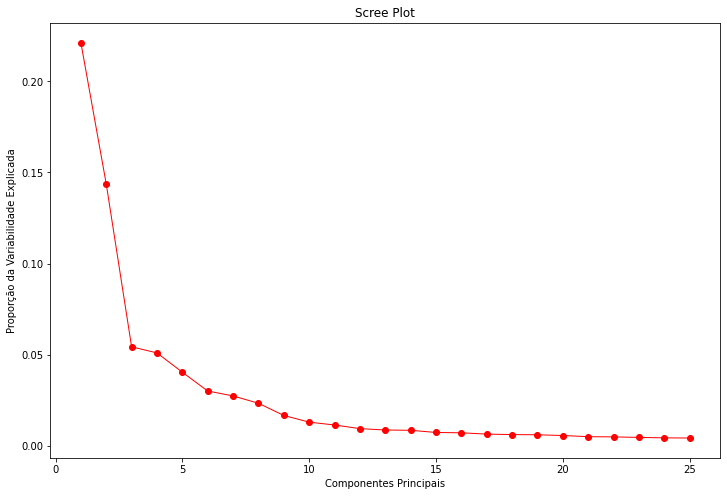

In [75]:
PC25_values = np.arange(pca25.n_components_) + 1
plt.figure(figsize=(12,8))
plt.plot(PC25_values, pca25.explained_variance_ratio_, 'ro-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variabilidade Explicada')
plt.show()

In [76]:
x_train_pca25.shape, x_val_pca25.shape

((42000, 25), (18000, 25))

In [79]:
x_train_pca25_values = x_train_pca25.reshape(-1,5,5,1)
x_val_pca25_values = x_val_pca25.reshape(-1,5,5,1)

x_train_pca25_values.shape, x_val_pca25_values.shape

((42000, 5, 5, 1), (18000, 5, 5, 1))

In [88]:
m1_pca = Sequential()

m1_pca.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(5,5,1)))
m1_pca.add(layers.MaxPooling2D((2,2)))
m1_pca.add(layers.Flatten())
m1_pca.add(layers.Dense(54, activation='relu'))
m1_pca.add(layers.Dense(10, activation='softmax'))

In [89]:
m1_pca.compile(
    optimizer = opt, 
    loss = loss_function, 
    metrics = ['accuracy']
)

In [90]:
m1_pca_hist = m1_pca.fit(x_train_pca25_values, y_train, epochs=20,
                       validation_data = (x_val_pca25_values, y_val))

Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7845 - accuracy: 0.7250 - val_loss: 0.6064 - val_accuracy: 0.7796
Epoch 2/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.5819 - accuracy: 0.7878 - val_loss: 0.5796 - val_accuracy: 0.7889
Epoch 3/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.5426 - accuracy: 0.8005 - val_loss: 0.5518 - val_accuracy: 0.7983
Epoch 4/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.5206 - accuracy: 0.8116 - val_loss: 0.5211 - val_accuracy: 0.8126
Epoch 5/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.5074 - accuracy: 0.8155 - val_loss: 0.5026 - val_accuracy: 0.8149
Epoch 6/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.4954 - accuracy: 0.8181 - val_loss: 0.5074 - val_accuracy: 0.8157
Epoch 7/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.4869 - accuracy: 0.8224 - val_loss: 0.5028 - val_accuracy:

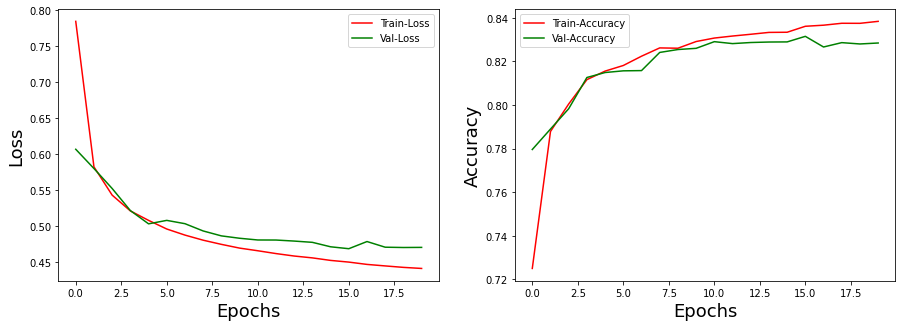

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(m1_pca_hist.history['loss'], color='red', label='Train-Loss')
plt.plot(m1_pca_hist.history['val_loss'], color='green', label='Val-Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(m1_pca_hist.history['accuracy'], color='red', label='Train-Accuracy')
plt.plot(m1_pca_hist.history['val_accuracy'], color='green', label='Val-Accuracy')
plt.legend(loc='best')
plt.show()

In [92]:
pca100 = PCA(n_components=100)
x_train_pca100 = pca100.fit(x_train_scaled).transform(x_train_scaled)
x_val_pca100 = pca100.transform(x_val_scaled)

In [93]:
variab_top100 = pca100.explained_variance_ratio_

pca100_values = {
    'Componente':np.arange(pca100.n_components_) + 1,
    'Variab Explicada':variab_top100,
    'Variab Acumulada':np.cumsum(variab_top100)
}

In [94]:
pd.DataFrame(pca100_values).tail(30)

,Componente,Variab Explicada,Variab Acumulada
70,71,0.001442,0.837372
71,72,0.001425,0.838797
72,73,0.001406,0.840203
73,74,0.001384,0.841587
74,75,0.001373,0.842960
75,76,0.001354,0.844313
76,77,0.001340,0.845654
77,78,0.001307,0.846961
78,79,0.001284,0.848244
79,80,0.001265,0.849510


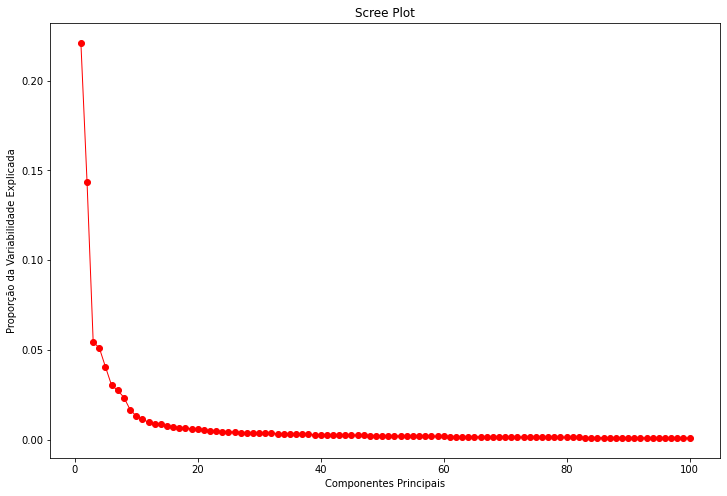

In [95]:
PC100_values = np.arange(pca100.n_components_) + 1
plt.figure(figsize=(12,8))
plt.plot(PC100_values, pca.explained_variance_ratio_, 'ro-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variabilidade Explicada')
plt.show()

In [96]:
x_train_pca100.shape, x_val_pca100.shape

((42000, 100), (18000, 100))

In [97]:
x_train_pca100_values = x_train_pca100.reshape(-1,10,10,1)
x_val_pca100_values = x_val_pca100.reshape(-1,10,10,1)

x_train_pca100_values.shape, x_val_pca100_values.shape

((42000, 10, 10, 1), (18000, 10, 10, 1))

In [98]:
m2_pca = Sequential()

m2_pca.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(10,10,1)))
m2_pca.add(layers.MaxPooling2D((2,2)))
m2_pca.add(layers.Conv2D(64, (3,3), activation='relu'))
m2_pca.add(layers.Flatten())
m2_pca.add(layers.Dense(54, activation='relu'))
m2_pca.add(layers.Dense(10, activation='softmax'))

In [99]:
m2_pca.compile(
    optimizer = opt, 
    loss = loss_function, 
    metrics = ['accuracy']
)

In [100]:
m2_pca_hist = m2_pca.fit(x_train_pca100_values, y_train, epochs=20,
                       validation_data = (x_val_pca100_values, y_val))

Epoch 1/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.6317 - accuracy: 0.7852 - val_loss: 0.4832 - val_accuracy: 0.8282
Epoch 2/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4394 - accuracy: 0.8422 - val_loss: 0.4124 - val_accuracy: 0.8502
Epoch 3/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3978 - accuracy: 0.8554 - val_loss: 0.4039 - val_accuracy: 0.8544
Epoch 4/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3693 - accuracy: 0.8644 - val_loss: 0.3967 - val_accuracy: 0.8574
Epoch 5/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8715 - val_loss: 0.3930 - val_accuracy: 0.8581
Epoch 6/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3297 - accuracy: 0.8783 - val_loss: 0.4115 - val_accuracy: 0.8546
Epoch 7/20
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3104 - accuracy: 0.8845 - val_loss: 0.3920 - val_accuracy:

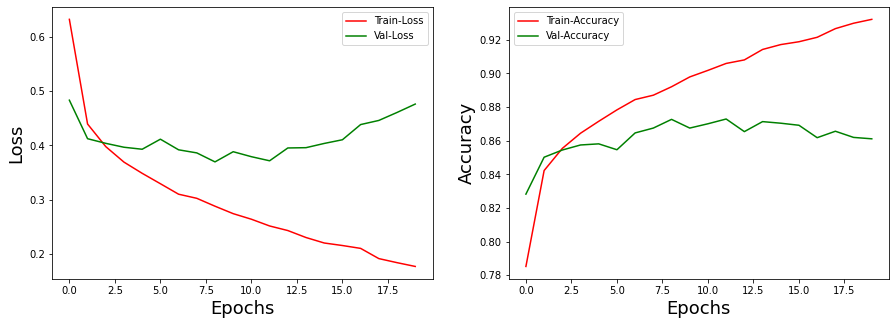

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(m2_pca_hist.history['loss'], color='red', label='Train-Loss')
plt.plot(m2_pca_hist.history['val_loss'], color='green', label='Val-Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.plot(m2_pca_hist.history['accuracy'], color='red', label='Train-Accuracy')
plt.plot(m2_pca_hist.history['val_accuracy'], color='green', label='Val-Accuracy')
plt.legend(loc='best')
plt.show()

In [16]:
# Re-do the first experiment considering the PCA dimensionality reduction

3. (0.5 point) What can we infer when analyzing the breakdown of data into components using a chart to plot the data in 2-dimensional space to view separation?

In [102]:
# In order to see how the PCA components are separating out the digits, lets use the following method, plot_components, to plot the data in a 2 dimensional space to view separation.
# The input parameters are the PCA fit in X and the labels
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])

In [103]:
pca2 = PCA(n_components=2)
x_train_pca2 = pca2.fit(x_train_scaled).transform(x_train_scaled)

In [113]:
y_train_label = np.argmax(y_train, axis=1)

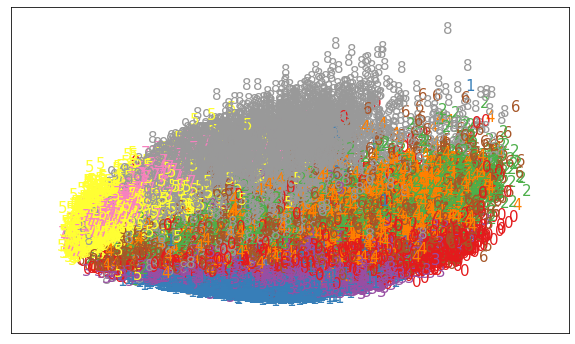

In [114]:
# The input parameters are the PCA fit in X and the labels
plot_components(x_train_pca2, y_train_label)

4. (2 points) How many components are needed for a better evaluation of the model? Define the minimum and maximum components to be tested using the energies_number method. How can we evaluate this graph and the quantity that was defined as best for the problem?

In [ ]:
# Iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same random neural network.

def energies_number(min, max, X):
    # Select a range of min and max number of dimensions, min/max.

    acc_list, pc_list = [], []
    for pc in range(min,max):
        pca = # Run the PCA algorithm for dimensionality reduction.
        acc = # Calculate the accuracy of the neural network using the reduced dimension by PCA
        acc_list.append(acc)
        pc_list.append(pc)
    return acc_list, pc_list

acc_list, pc_list = energies_number( #?, #? , #? )

In [ ]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Neural Network Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [ ]:
print('The maximum accuracy attained is ',np.max(acc_list),'% with ',pc_list[np.where(acc_list == np.max(acc_list))[0][0]],' principal components. Beyond this peak, additional principal components appear to mostly contribute noise.')

5. (3.5 points) Using Autoencoders: Re-do the first experiment (question 2) considering Autoencoders for reducing the image dimensionality. (3 points) Consider two different latent vector sizes for reducing the image dimensionality. (0.5 points) What are the conclusions when using Autoencoders in this problem? Does accuracy improve? 

Autoencoders are a branch of neural networks which attempt to compress the information of the input variables into a reduced dimensional space and then recreate the input data set. Typically the autoencoder is trained over some iterations using gradient descent, minimizing the mean squared error.
The key component is the “bottleneck” hidden layer. This is where the information from the input has been compressed. By extracting this layer from the model, each node can be treated as a variable in the same way each chosen principal component is used in the following models.

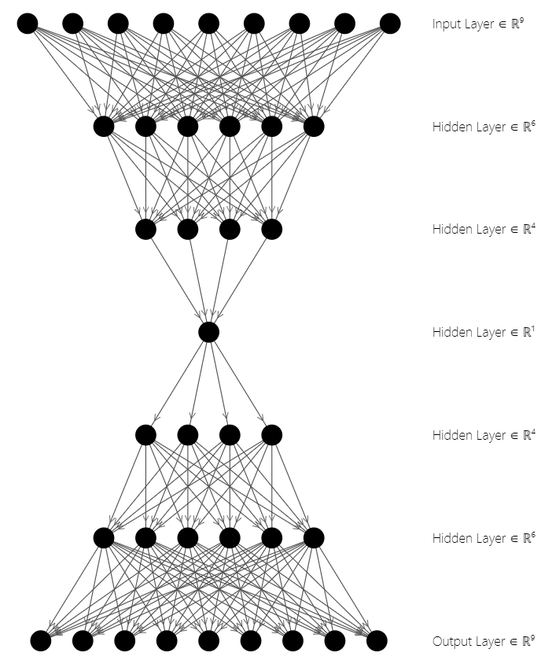

In [ ]:
# Create your AutoEncoder network architecture:

In [ ]:
# Re-do the first experiment (question 2) considering the autoencoder dimensionality reduction

In [ ]:
# What are the conclusions when using Autoencoders in this problem? Does accuracy improve?

## Deadline

Monday, November 18, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- November 19, 11:59 pm : grade * 0.75
- November 20, 11:59 pm : grade * 0.5
- November 21, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**